In [1]:
import pandas as pd

pos

In [3]:
df_pos = pd.read_csv('../../data/basedata/df_pos_wide.csv').query('Ontology not in ["NAE","Others"]')
ontlist = pd.DataFrame(df_pos.Ontology.value_counts()).reset_index().query('count >= 4').Ontology.tolist()
df_pos2 = df_pos[df_pos['Ontology'].isin(ontlist)].reset_index(drop=True).reset_index(drop=True).set_index(['Metabolitename', 'Ontology', 'dataset', 'AlignmentID', 'AverageMz'])
df_pos2x = df_pos2.loc[:, df_pos2.sum() >= 6].reset_index()
df_pos2x.to_csv('../../data/basedata/df_pos_filter.csv', index=False)

columns_to_drop = ['Metabolitename', 'Ontology', 'dataset', 'AlignmentID', 'AverageMz']
print(df_pos2.shape, df_pos2x.drop(columns=columns_to_drop).shape)

from sklearn.model_selection import train_test_split
X = df_pos2x.drop(columns=columns_to_drop).astype(float).values
y = df_pos2x['Ontology']
print(len(y.unique()))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
X_train.shape

(8451, 2075) (8451, 1186)
63


(6760, 1186)

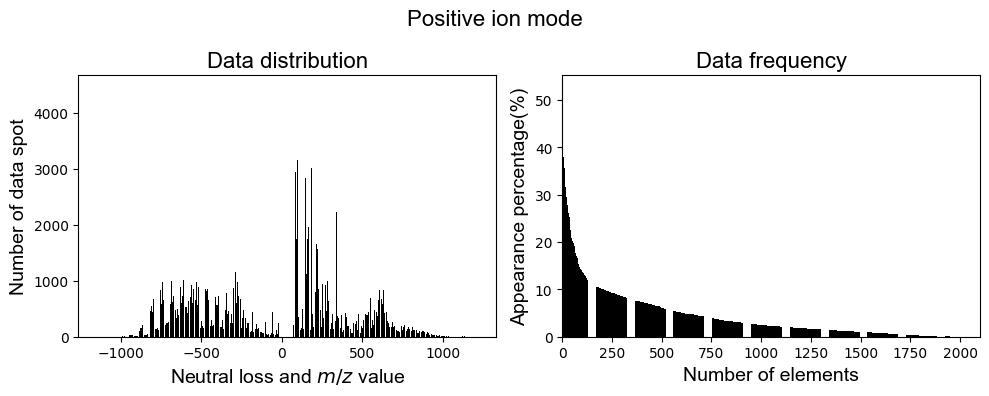

In [4]:
import matplotlib.pyplot as plt
from matplotlib import font_manager as fm

non_zero_counts_pos = (df_pos2.reset_index().drop(columns=columns_to_drop).astype(float) != 0).sum()
df_dist = pd.DataFrame(non_zero_counts_pos).reset_index().astype(int)
df_dist['perc_value'] = (df_dist[0] / 8451) * 100
df_sorted  = df_dist.sort_values('perc_value', ascending=False)

arial_path = '../../arial.ttf'
arial = fm.FontProperties(fname=arial_path)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))

ax1.bar(df_dist['index'], df_dist[0], color='black')
ax1.set_xlabel(r'Neutral loss and $\it{m/z}$ value', fontproperties=arial, size=14)
ax1.set_ylabel('Number of data spot',fontproperties=arial, size=14)
ax1.set_title('Data distribution',fontproperties=arial, size=16)

ax2.bar(range(len(df_sorted)), df_sorted['perc_value'], color='black')
ax2.set_xlabel('Number of elements',fontproperties=arial, size=14)
ax2.set_ylabel('Appearance percentage(%)',fontproperties=arial, size=14)
ax2.set_title('Data frequency',fontproperties=arial, size=16)
ax2.set_xlim(0, 2100)

plt.tight_layout()
fig.suptitle('Positive ion mode',fontproperties=arial, fontsize=16) 
fig.tight_layout(rect=[0, 0, 1, 1]) 
plt.savefig('../../data/fig/dataset/fig_dist_pos.svg', dpi=300)

neg

In [5]:
df_neg = pd.read_csv('../../data/basedata/df_neg_wide.csv').query('Ontology not in ["FA","Others"]')
ontlist = pd.DataFrame(df_neg.Ontology.value_counts()).reset_index().query('count >= 4').Ontology.tolist()
df_neg2 = df_neg[df_neg['Ontology'].isin(ontlist)].reset_index(drop=True).reset_index(drop=True).set_index(['Metabolitename', 'Ontology', 'dataset', 'AlignmentID', 'AverageMz'])
df_neg2x = df_neg2.loc[:, df_neg2.sum() >= 4].reset_index()
df_neg2x.to_csv('../../data/basedata/df_neg_filter.csv', index=False)
print(df_neg2.shape, df_neg2x.drop(columns=columns_to_drop).shape)

from sklearn.model_selection import train_test_split
columns_to_drop = ['Metabolitename', 'Ontology', 'dataset', 'AlignmentID', 'AverageMz']
X = df_neg2x.drop(columns=columns_to_drop).astype(float).values
y = df_neg2x['Ontology']
print(len(y.unique()))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
X_train.shape

(8578, 2112) (8578, 1138)
69


(6862, 1138)

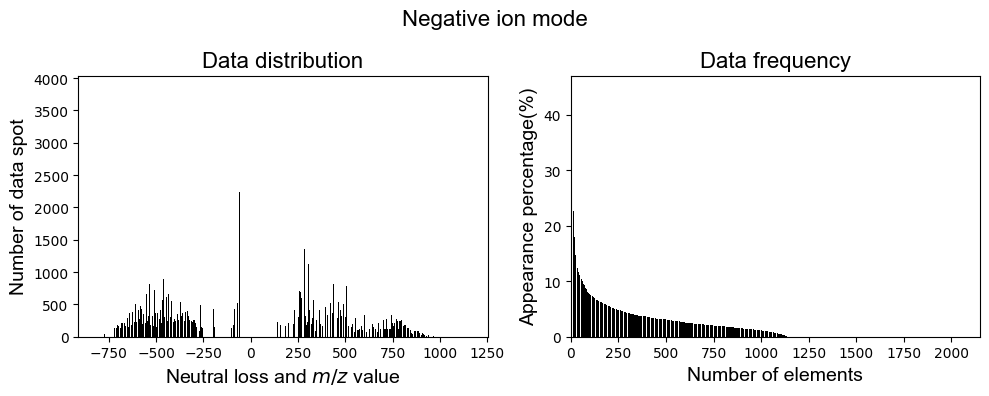

In [6]:
import matplotlib.pyplot as plt
from matplotlib import font_manager as fm

non_zero_counts_neg = (df_neg2x.drop(columns=columns_to_drop).astype(float) != 0).sum()
df_dist = pd.DataFrame(non_zero_counts_neg).reset_index().astype(int)
df_dist['perc_value'] = (df_dist[0] / 8578) * 100
df_sorted  = df_dist.sort_values('perc_value', ascending=False)

arial_path = '../../arial.ttf'
arial = fm.FontProperties(fname=arial_path)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))

ax1.bar(df_dist['index'], df_dist[0], color='black')
ax1.set_xlabel(r'Neutral loss and $\it{m/z}$ value', fontproperties=arial, size=14)
ax1.set_ylabel('Number of data spot',fontproperties=arial, size=14)
ax1.set_title('Data distribution',fontproperties=arial, size=16)

ax2.bar(range(len(df_sorted)), df_sorted['perc_value'], color='black')
ax2.set_xlabel('Number of elements',fontproperties=arial, size=14)
ax2.set_ylabel('Appearance percentage(%)',fontproperties=arial, size=14)
ax2.set_title('Data frequency',fontproperties=arial, size=16)
ax2.set_xlim(0, 2150)

plt.tight_layout()
fig.suptitle('Negative ion mode',fontproperties=arial, fontsize=16) 
fig.tight_layout(rect=[0, 0, 1, 1]) 
plt.savefig('../../data/fig/dataset/fig_dist_neg.svg', dpi=300)

MCH-value

In [7]:
import re

def calculate_average_atomic_mass(molecular_formula):
    # Define mass
    average_atomic_masses = {'H': 1.007825, 'C': 12.000000, 'O':15.994915}
    # Calculate atomic mass from molecular formula
    elements_with_counts = re.findall(r'([A-Z][a-z]*)(\d*)', molecular_formula)
    element_counts = {element[0]: int(element[1]) if element[1] else 1 for element in elements_with_counts}
    average_atomic_mass = sum(element_counts[element] * average_atomic_masses[element] for element in element_counts)
    return average_atomic_mass

def cal_mod(averagemz):
    num = ((averagemz % calculate_average_atomic_mass('CH2')) % calculate_average_atomic_mass('H2')) % (calculate_average_atomic_mass('H14') % calculate_average_atomic_mass('CH2')) 
    return num

pos

In [8]:
df_pos2x = pd.read_csv('../../data/basedata/df_pos_filter.csv')
df_pos2x['MCHvalue'] = cal_mod(df_pos2x['AverageMz'])
df_pos2x.to_csv('../../data/basedata/df_pos_MCH.csv', index=False)

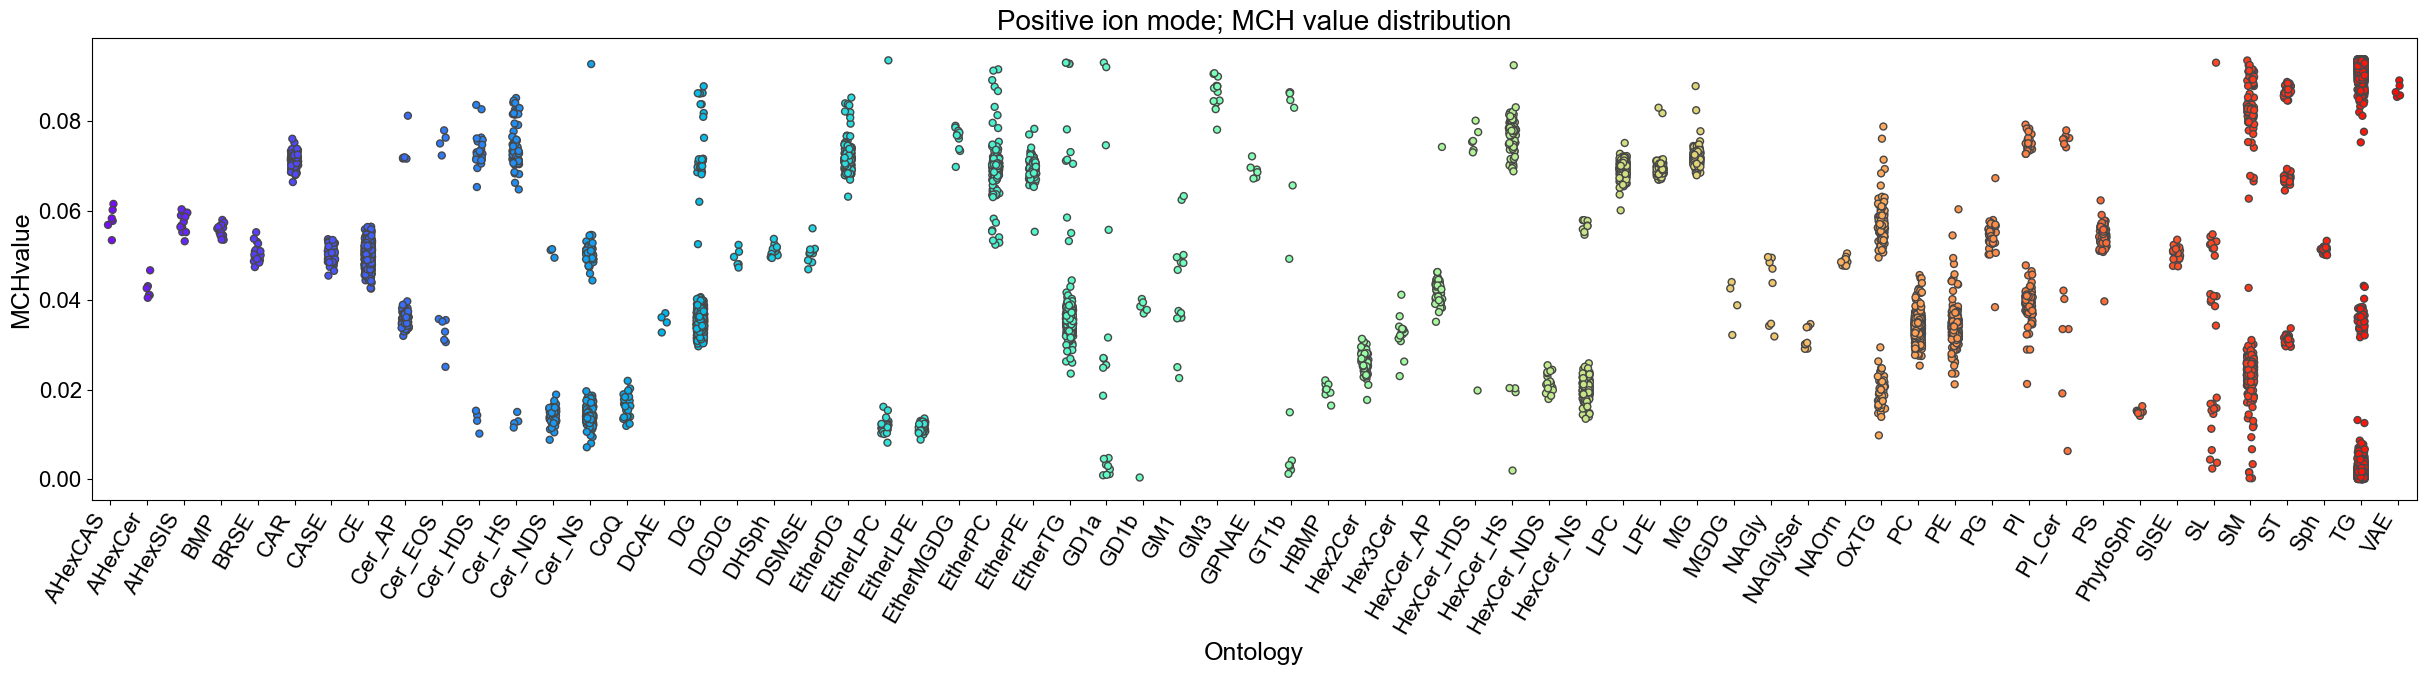

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

df_mch = df_pos2x[['Ontology', 'MCHvalue']].sort_values('Ontology', ascending=True)

arial_path = '../../arial.ttf'
arial = fm.FontProperties(fname=arial_path, size=16)

fig, ax = plt.subplots(figsize=(30, 6))
sns.stripplot(x='Ontology', y='MCHvalue', hue='Ontology', data=df_mch, jitter=True, linewidth=1, palette='rainbow', ax=ax)

for label in ax.get_xticklabels():
    label.set_fontproperties(arial)
for label in ax.get_yticklabels():
    label.set_fontproperties(arial)

ax.set_title('Positive ion mode; MCH value distribution', fontproperties=arial, fontsize=20)
ax.set_xlabel(ax.get_xlabel(), fontproperties=arial, fontsize=18)
ax.set_ylabel(ax.get_ylabel(), fontproperties=arial, fontsize=18)

plt.xticks(rotation=60, ha='right')
plt.savefig('../../data/fig/value/fig_mch_pos.svg', dpi=300)
plt.show()

neg

In [10]:
df_neg2x = pd.read_csv('../../data/basedata/df_neg_filter.csv')
df_neg2x['MCHvalue'] = cal_mod(df_neg2x['AverageMz'])
df_neg2x.to_csv('../../data/basedata/df_neg_MCH.csv', index=False)

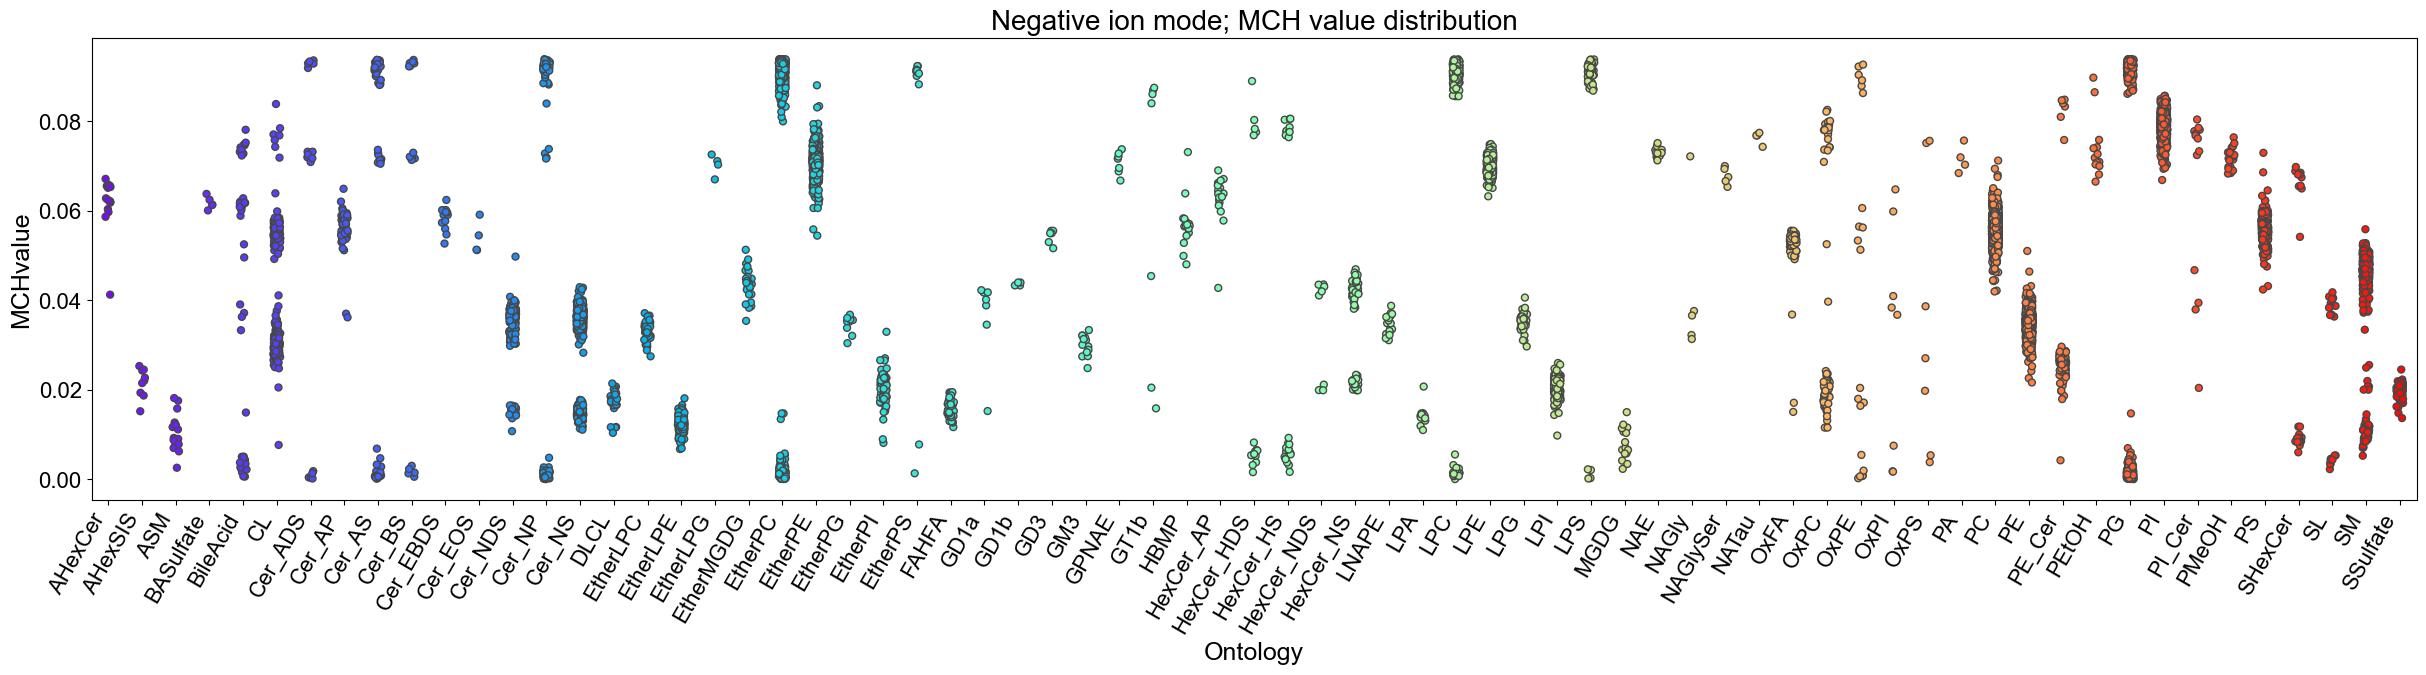

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

df_mch = df_neg2x[['Ontology', 'MCHvalue']].sort_values('Ontology', ascending=True)

arial_path = '../../arial.ttf'
arial = fm.FontProperties(fname=arial_path, size=16)

fig, ax = plt.subplots(figsize=(30, 6))
sns.stripplot(x='Ontology', y='MCHvalue', hue='Ontology', data=df_mch, jitter=True, linewidth=1, palette='rainbow', ax=ax)

for label in ax.get_xticklabels():
    label.set_fontproperties(arial)
for label in ax.get_yticklabels():
    label.set_fontproperties(arial)

ax.set_title('Negative ion mode; MCH value distribution', fontproperties=arial, fontsize=20)
ax.set_xlabel(ax.get_xlabel(), fontproperties=arial, fontsize=18)
ax.set_ylabel(ax.get_ylabel(), fontproperties=arial, fontsize=18)

plt.xticks(rotation=60, ha='right')
plt.savefig('../../data/fig/value/fig_mch_neg.svg', dpi=300)
plt.show()